<a href="https://colab.research.google.com/github/DavMLPath/PhD-Theses/blob/main/Banking_Stability_Modeling_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#showes ridge coefficients start from
ridge_param=0.2
corr_param=0.06
lasso_cv_param=5

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from statistics import mean
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from datetime import date, timedelta



# **Extracting data from drive**

In [ ]:
#importing libs for the model
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
# #independent variables

# x=pd.read_excel('/content/drive/My Drive/Dissertation/Data/factors_all.xlsx', sheet_name='Factors')
# x.columns=x.iloc[0,:]
# x=x.iloc[1:].reset_index(drop=True)
# x.index=x['Date']
# x

#independent variables

x=pd.read_excel('/content/drive/My Drive/Dissertation/Data/factors_all_final.xlsx', sheet_name='Factors')

# x.columns=x.iloc[0,:]

x.index=x['Date']
x.drop(columns=['Date'], inplace=True)
# x['Mortgage loans'] = np.log(x['Mortgage loans'])
x['Mortgage loans']=np.log(x['Mortgage loans'])

In [ ]:
x.columns.values

array(['Inflow (trade)', 'Inflow (non-trade)', 'Outflow (trade)',
       'Outflow (non-trade)', 'Reserve position in the IMF',
       'Foreign Exchange Reserves', 'Medium term government bond yield',
       'Government bond yield (<365 days)',
       'Government’s net domestic assets (million AMD)',
       'Banks’ net domestic assets (million AMD)',
       'Net other assets (million AMD)', 'CPI',
       'CPI-Consumer goods (including alcoholic beverages and tobacco)',
       'CPI-Non-consumer goods', 'CPI-Services',
       'Economic activity index',
       'Inv. comp. Sales and purchase transactions (million AMD)',
       'Inv. comp. Repo transactions (million AMD)',
       'Normative capital ratio to risk-weighted assets',
       'Tier 1 capital ratio to risk-weighted assets',
       'Non-performing loans ratio to total loans', 'Return on assets',
       'Return on capital', 'High liquidity assets ratio to total assets',
       'High liquidity assets ratio to demand liabilities',
    

In [ ]:
len(x.columns.values)


66

In [ ]:
#ROA+(equity/assets))/sd(ROA)

to_change=[
'Industry Loans'
,'Demand deposits in AMD (million AMD)'
,'Time deposits in AMD (million AMD)'
,'Foreign currency deposits (million AMD)'
,'Inv. comp. Sales and purchase transactions (million AMD)'
,'Construction loans'
,'Agriculture loans'
#,'Accumulated profit (million AMD)'
,'Total capital (million AMD)'
,'Consumer loans loans'
#,'Repo agreements (million AMD)'
,'Mortgage loans'
,'Trade loans'
,'Total liabilities (million AMD)'
,'High liquidity assets ratio to demand liabilities'
,'Russian Ruble/AMD'
,'Euro/AMD'
,'US Dollar/AMD'
,'Normative capital ratio to risk-weighted assets'
,'High liquidity assets ratio to total assets'
,'CPI'
]

for i in to_change:
  x[i]=x[i].pct_change()


In [ ]:
x['Dolarisation_avg']=(x['D1']+x['D2']+x['D3']+x['D5']+x['D4'])/4
x['Gov. bond yealds']=(x['Medium term government bond yield']+x['Government bond yield (<365 days)'])/2
x['fc-loans']=x["Industry Loans (fc)"]+x["Agriculture loans (fc)"]+x["Construction loans (fc)"]+x["Trade loans (fc)"]+x["Service sector loans (fc)"]+x["Consumer loans loans (fc)"]+x["Others loans (fc)"]
x.drop(columns=['Repo agreements (million AMD)','Accumulated profit (million AMD)','Total assets (million AMD)','Return on assets','Industry Loans (fc)', 'Agriculture loans (fc)', 'Construction loans (fc)', 'Trade loans (fc)', 'Service sector loans (fc)', 'Consumer loans loans (fc)', 'Others loans (fc)', 'D1', 'D2', 'D3', 'D4', 'D5','Medium term government bond yield','Government bond yield (<365 days)'], inplace=True)
x.drop(columns=['British Pound Sterling/AMD', 'Iranian Rial/AMD','Tier 1 capital ratio to risk-weighted assets','CPI-Consumer goods (including alcoholic beverages and tobacco)','CPI-Non-consumer goods','Swiss Franc/AMD', 'Georgian Lari/AMD'], inplace=True)

x['Dolarisation_avg']=x['Dolarisation_avg'].pct_change()
x.drop('2012-12-01', inplace=True)


In [ ]:
x.columns.values

array(['Inflow (trade)', 'Inflow (non-trade)', 'Outflow (trade)',
       'Outflow (non-trade)', 'Reserve position in the IMF',
       'Foreign Exchange Reserves',
       'Government’s net domestic assets (million AMD)',
       'Banks’ net domestic assets (million AMD)',
       'Net other assets (million AMD)', 'CPI', 'CPI-Services',
       'Economic activity index',
       'Inv. comp. Sales and purchase transactions (million AMD)',
       'Inv. comp. Repo transactions (million AMD)',
       'Normative capital ratio to risk-weighted assets',
       'Non-performing loans ratio to total loans', 'Return on capital',
       'High liquidity assets ratio to total assets',
       'High liquidity assets ratio to demand liabilities',
       'US Dollar/AMD', 'Euro/AMD', 'Russian Ruble/AMD',
       'Cash in circulation (million AMD)',
       'Demand deposits in AMD (million AMD)',
       'Time deposits in AMD (million AMD)',
       'Foreign currency deposits (million AMD)',
       'Total liabiliti

In [ ]:
y=pd.read_excel('/content/drive/My Drive/Dissertation/Data/factors_all_final.xlsx', sheet_name='Z-score(Y)')

# # x.columns=x.iloc[0,:]

y.index=y['Date']
y.drop(columns=['Date'], inplace=True)
y

,Z-score
Date,
2013-01-01,7.521965
2013-02-01,7.951818
2013-03-01,7.337288
2013-04-01,5.987805
2013-05-01,8.550364
...,...
2024-08-01,7.824952
2024-09-01,8.755918
2024-10-01,6.504123


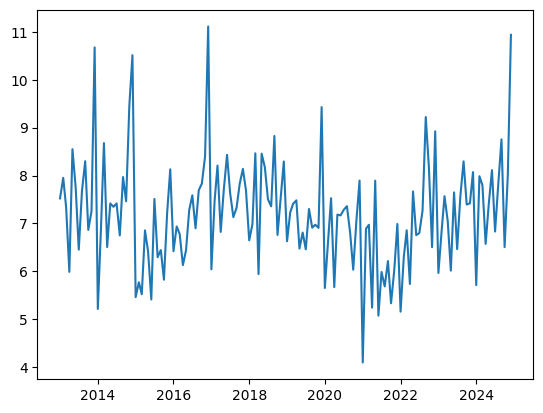

In [ ]:
plt.plot(y)

In [ ]:
x_back=x.copy(deep=True)

In [ ]:
y_back=y.copy(deep=True)

In [ ]:
# factors=a[a['close'].isnull()==False]
# factors

## **Its time to do data transformations**

1.   Stationarity check
2.   Feature engineering and scaling (if necessary)


In [ ]:
#function for checking stationarity and returinig stationarized series
def check_stationarity(series):
  for i in range(0, 50):
      if i==0:
        dep_var = series
      else:
        dep_var= series - series.shift(i).fillna(0)
      result = adfuller(dep_var)
      adf_statistic = result[0]
      p_value = result[1]
      if float(("%.17f" % p_value).rstrip('0').rstrip('.'))<=0.05:
        break
  return i,("%.17f" % p_value).rstrip('0').rstrip('.'), dep_var
#      print("p-value:", ("%.17f" % p_value).rstrip('0').rstrip('.'))


In [ ]:
#choosing stationarity parameter for the dependent variable
a=check_stationarity(y['Z-score'])
y=a[2]
y

,Z-score
Date,
2013-01-01,7.521965
2013-02-01,0.429852
2013-03-01,-0.614530
2013-04-01,-1.349483
2013-05-01,2.562559
...,...
2024-08-01,0.994868
2024-09-01,0.930966
2024-10-01,-2.251795


In [ ]:
#x.info()

In [ ]:
#creating dictionary with stationarised variables
dict_normalized=pd.DataFrame()
stationarity=[]
features=[]
levels=[]
for i in x:
  if i not in ['Date', 'Բանկային տոկոս']:
    x[i].fillna(0, inplace = True)
    dict_normalized[i]=check_stationarity(x[i])[2]
    #print(check_stationarity(x[i])[0]   )
    stationarity.append([i, check_stationarity(x[i])[0]])
    features.append(i)
    levels.append(check_stationarity(x[i])[0])
# dict_normalized

<ipython-input-18-5b5da57725ae>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x[i].fillna(0, inplace = True)
<ipython-input-18-5b5da57725ae>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col:

In [ ]:
print(len(features))
print(len(levels))
# pd.DataFrame({"name":features, "diff_level":levels})

44
44


In [ ]:
type(dict_normalized.std().values)

numpy.ndarray

In [ ]:
denormdf=pd.DataFrame({"name":features, "diff_level":levels})
denormdf.sort_values(by='diff_level', ascending=False)



,name,diff_level
40,bitcoin_price,5
39,Mortgage loans (fc),4
28,Foreign debt,3
22,Cash in circulation (million AMD),2
42,Gov. bond yealds,2
5,Foreign Exchange Reserves,1
7,Banks’ net domestic assets (million AMD),1
6,Government’s net domestic assets (million AMD),1
0,Inflow (trade),1
1,Inflow (non-trade),1


In [ ]:
# stationarity['stdev']=dict_normalized.std().values
# stationarity

In [ ]:
#stationarity.to_csv('/content/drive/My Drive/Dissertation/levels_stdevs.csv')

In [ ]:
#variables, that are not stationary after 3-rd lag, we will exclude from model
s_list=pd.DataFrame(stationarity, columns=["factor", "level"])
valid_factors=s_list['factor'][s_list['level'].astype(float)<=7]
invalid_factors=s_list['factor'][s_list['level'].astype(float)>7]
valid_factors

,factor
0,Inflow (trade)
1,Inflow (non-trade)
2,Outflow (trade)
3,Outflow (non-trade)
4,Reserve position in the IMF
5,Foreign Exchange Reserves
6,Government’s net domestic assets (million AMD)
7,Banks’ net domestic assets (million AMD)
8,Net other assets (million AMD)
9,CPI


In [ ]:
s_list[s_list['factor'].isin(invalid_factors)]

,factor,level


In [ ]:
#defining X and Y

In [ ]:
x=dict_normalized
x=x[valid_factors]

In [ ]:
#x

In [ ]:
y=pd.DataFrame({'Z-score':y})
#y

In [ ]:
# x.columns.values

In [ ]:
denormdf=denormdf[denormdf['name'].isin(x.columns.values)]

In [ ]:
denormdf.sort_values(by='diff_level', ascending=False)
denormdf.to_csv('/content/drive/My Drive/Dissertation/diff_levels.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)


In [ ]:
denormdf['scale']=scaler.scale_
#denormdf.to_csv('/content/drive/My Drive/Dissertation/denorm_df.csv')

In [ ]:
X=pd.DataFrame(x_scaled, columns=x.columns.values)
X.index=x.index

# **Feature engineering**


In [ ]:
x

,Inflow (trade),Inflow (non-trade),Outflow (trade),Outflow (non-trade),Reserve position in the IMF,Foreign Exchange Reserves,Government’s net domestic assets (million AMD),Banks’ net domestic assets (million AMD),Net other assets (million AMD),CPI,...,Service sector loans,Consumer loans loans,Mortgage loans,Others loans,Transport and communications loans (fc),Mortgage loans (fc),bitcoin_price,Dolarisation_avg,Gov. bond yealds,fc-loans
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,11826.68,33862.69,15899.23,8403.41,31.817898,1736.221600,-130755.122057,175166.317124,191825.191936,0.007731,...,20598.408605,0.016509,-8.361170e-04,10917.020328,32666.773688,62998.863526,15.000000,0.013928,12.335275,891263.687361
2013-02-01,7332.97,8210.63,1565.86,1329.16,21.638079,13.721772,8784.708717,-7144.944087,11991.905376,-0.032008,...,-124.631052,0.007990,-3.522740e-05,443.378554,561.564889,64452.406933,25.000000,-0.021937,11.872312,25180.900111
2013-03-01,-3197.75,7165.59,-1877.86,912.39,1.650734,-120.376184,17477.634089,-14956.803026,-5716.027709,0.008236,...,-219.976200,0.040489,1.274980e-03,449.698689,1234.427285,67016.688425,60.000000,0.016117,-0.083237,-26975.933163
2013-04-01,5114.83,5428.33,1763.01,1442.81,13.734087,-5.115828,-525.131654,34360.739424,8304.680643,-0.005153,...,-152.219333,0.022991,3.834620e-04,-392.725488,-338.434759,66225.477979,139.000000,-0.017397,-0.221275,-5167.004804
2013-05-01,-6452.27,3755.59,1658.06,-1599.29,34.359215,10.891774,4855.041315,-4500.227729,8976.615989,0.000654,...,-583.160852,0.015826,-3.168855e-06,-302.921989,1830.300284,4955.669126,129.000000,0.015284,-1.102054,15844.272148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,24925.65,554.09,77912.11,-1556.86,13.475149,187.925419,2617.704885,27185.359100,-7652.661133,0.004633,...,1322.195612,0.023861,3.354004e-04,-1072.640564,1951.464976,-3781.283871,-12363.749560,0.012895,-0.028073,95920.264544
2024-09-01,-56829.70,-1521.70,-82302.54,-1235.03,9.227394,-26.671386,-16101.726421,172820.045148,-12042.863691,0.000839,...,3909.494825,0.025566,-4.624434e-07,3103.909994,7100.521535,-3605.958307,2692.641349,0.001082,0.138800,56721.469969
2024-10-01,60900.61,-939.55,33078.52,2565.81,9.081365,17.315612,62860.027044,-236751.305851,-1405.180998,0.001199,...,1592.963334,0.024482,4.086000e-04,1423.146486,15010.185672,-1479.566400,2725.573856,-0.012822,0.011300,13870.530043


**Lasso model for not lagged**



In [ ]:
X.corr()

,Inflow (trade),Inflow (non-trade),Outflow (trade),Outflow (non-trade),Reserve position in the IMF,Foreign Exchange Reserves,Government’s net domestic assets (million AMD),Banks’ net domestic assets (million AMD),Net other assets (million AMD),CPI,...,Service sector loans,Consumer loans loans,Mortgage loans,Others loans,Transport and communications loans (fc),Mortgage loans (fc),bitcoin_price,Dolarisation_avg,Gov. bond yealds,fc-loans
Inflow (trade),1.000000,0.293460,0.507220,0.208820,-0.014551,0.137261,0.098166,0.138123,0.126441,-0.088357,...,0.162275,-0.016430,0.333346,0.050402,-0.037776,-0.006857,-0.001425,-0.284902,0.016756,0.034937
Inflow (non-trade),0.293460,1.000000,0.258959,0.570080,0.093912,0.382040,0.174809,0.116534,0.167735,-0.236099,...,0.309707,0.043241,0.558717,0.305590,0.109939,0.159549,0.009872,-0.389460,0.150852,0.253476
Outflow (trade),0.507220,0.258959,1.000000,0.192759,0.045906,0.116301,0.105721,-0.027444,0.104754,-0.172617,...,0.054897,-0.002539,0.235713,0.011811,-0.138326,-0.030578,-0.058775,-0.100586,0.020912,0.083264
Outflow (non-trade),0.208820,0.570080,0.192759,1.000000,0.061872,0.334144,-0.036802,0.030590,0.143514,-0.082101,...,0.126874,0.126577,0.454795,0.161733,0.222676,0.190036,0.014516,-0.231328,0.157967,0.324278
Reserve position in the IMF,-0.014551,0.093912,0.045906,0.061872,1.000000,-0.029807,-0.000161,-0.096798,0.060151,-0.002414,...,-0.058827,-0.203081,-0.004083,-0.045441,-0.051957,-0.034987,-0.074320,0.161309,0.133222,0.048049
Foreign Exchange Reserves,0.137261,0.382040,0.116301,0.334144,-0.029807,1.000000,-0.469969,0.170362,0.291970,0.013305,...,0.487837,0.074968,0.154138,0.277551,0.254990,0.211402,-0.060551,-0.179909,0.382572,0.582302
Government’s net domestic assets (million AMD),0.098166,0.174809,0.105721,-0.036802,-0.000161,-0.469969,1.000000,-0.076457,-0.230156,-0.012418,...,-0.059254,-0.052869,0.165265,0.002105,-0.092670,-0.110725,-0.087831,-0.089827,-0.114296,-0.152149
Banks’ net domestic assets (million AMD),0.138123,0.116534,-0.027444,0.030590,-0.096798,0.170362,-0.076457,1.000000,-0.020718,0.113134,...,0.205644,0.029374,0.043854,-0.000888,0.041758,0.108622,0.118012,-0.112029,0.132873,0.199407
Net other assets (million AMD),0.126441,0.167735,0.104754,0.143514,0.060151,0.291970,-0.230156,-0.020718,1.000000,-0.074471,...,0.353732,0.010749,-0.072912,0.161959,0.251491,0.222996,-0.099578,-0.137596,0.386109,0.460950
CPI,-0.088357,-0.236099,-0.172617,-0.082101,-0.002414,0.013305,-0.012418,0.113134,-0.074471,1.000000,...,-0.025933,0.129268,-0.184825,0.072006,0.085026,-0.050316,-0.031690,0.211670,-0.142576,0.059089


In [ ]:
len(X.columns.values)

44

In [ ]:
x.describe().loc['count']

,count
Inflow (trade),144.0
Inflow (non-trade),144.0
Outflow (trade),144.0
Outflow (non-trade),144.0
Reserve position in the IMF,144.0
Foreign Exchange Reserves,144.0
Government’s net domestic assets (million AMD),144.0
Banks’ net domestic assets (million AMD),144.0
Net other assets (million AMD),144.0
CPI,144.0


In [ ]:
Highly_Correlated_column_name = {}
corr = x.corr().to_numpy()
column_names = x.columns
row_no = 0
for r in corr:
    col_no = 0
    for c in r:
        if (c>0.9 and c<1) or (c<-0.9 and c>-1):
            if column_names[row_no] in Highly_Correlated_column_name:
              if column_names[col_no] not in Highly_Correlated_column_name[column_names[row_no]]:
                Highly_Correlated_column_name[column_names[row_no]].append(column_names[col_no])
            else:
              Highly_Correlated_column_name[column_names[row_no]] = [column_names[col_no]]
            print(f"'{column_names[row_no]}', '{column_names[col_no]}', {c}")
        col_no+=1
    row_no += 1

In [ ]:
x.columns.values

array(['Inflow (trade)', 'Inflow (non-trade)', 'Outflow (trade)',
       'Outflow (non-trade)', 'Reserve position in the IMF',
       'Foreign Exchange Reserves',
       'Government’s net domestic assets (million AMD)',
       'Banks’ net domestic assets (million AMD)',
       'Net other assets (million AMD)', 'CPI', 'CPI-Services',
       'Economic activity index',
       'Inv. comp. Sales and purchase transactions (million AMD)',
       'Inv. comp. Repo transactions (million AMD)',
       'Normative capital ratio to risk-weighted assets',
       'Non-performing loans ratio to total loans', 'Return on capital',
       'High liquidity assets ratio to total assets',
       'High liquidity assets ratio to demand liabilities',
       'US Dollar/AMD', 'Euro/AMD', 'Russian Ruble/AMD',
       'Cash in circulation (million AMD)',
       'Demand deposits in AMD (million AMD)',
       'Time deposits in AMD (million AMD)',
       'Foreign currency deposits (million AMD)',
       'Total liabiliti

In [ ]:
#x.isnull().sum()
#X.corr().to_csv('/content/drive/My Drive/Dissertation/adjusted_corr_v3.csv')

In [ ]:
data=pd.concat([X,y], axis=1)

In [ ]:
data.corr()

,Inflow (trade),Inflow (non-trade),Outflow (trade),Outflow (non-trade),Reserve position in the IMF,Foreign Exchange Reserves,Government’s net domestic assets (million AMD),Banks’ net domestic assets (million AMD),Net other assets (million AMD),CPI,...,Consumer loans loans,Mortgage loans,Others loans,Transport and communications loans (fc),Mortgage loans (fc),bitcoin_price,Dolarisation_avg,Gov. bond yealds,fc-loans,Z-score
Inflow (trade),1.000000,0.293460,0.507220,0.208820,-0.014551,0.137261,0.098166,0.138123,0.126441,-0.088357,...,-0.016430,0.333346,0.050402,-0.037776,-0.006857,-0.001425,-0.284902,0.016756,0.034937,0.231497
Inflow (non-trade),0.293460,1.000000,0.258959,0.570080,0.093912,0.382040,0.174809,0.116534,0.167735,-0.236099,...,0.043241,0.558717,0.305590,0.109939,0.159549,0.009872,-0.389460,0.150852,0.253476,0.547856
Outflow (trade),0.507220,0.258959,1.000000,0.192759,0.045906,0.116301,0.105721,-0.027444,0.104754,-0.172617,...,-0.002539,0.235713,0.011811,-0.138326,-0.030578,-0.058775,-0.100586,0.020912,0.083264,0.160852
Outflow (non-trade),0.208820,0.570080,0.192759,1.000000,0.061872,0.334144,-0.036802,0.030590,0.143514,-0.082101,...,0.126577,0.454795,0.161733,0.222676,0.190036,0.014516,-0.231328,0.157967,0.324278,0.479944
Reserve position in the IMF,-0.014551,0.093912,0.045906,0.061872,1.000000,-0.029807,-0.000161,-0.096798,0.060151,-0.002414,...,-0.203081,-0.004083,-0.045441,-0.051957,-0.034987,-0.074320,0.161309,0.133222,0.048049,-0.020050
Foreign Exchange Reserves,0.137261,0.382040,0.116301,0.334144,-0.029807,1.000000,-0.469969,0.170362,0.291970,0.013305,...,0.074968,0.154138,0.277551,0.254990,0.211402,-0.060551,-0.179909,0.382572,0.582302,0.549776
Government’s net domestic assets (million AMD),0.098166,0.174809,0.105721,-0.036802,-0.000161,-0.469969,1.000000,-0.076457,-0.230156,-0.012418,...,-0.052869,0.165265,0.002105,-0.092670,-0.110725,-0.087831,-0.089827,-0.114296,-0.152149,-0.010435
Banks’ net domestic assets (million AMD),0.138123,0.116534,-0.027444,0.030590,-0.096798,0.170362,-0.076457,1.000000,-0.020718,0.113134,...,0.029374,0.043854,-0.000888,0.041758,0.108622,0.118012,-0.112029,0.132873,0.199407,0.347014
Net other assets (million AMD),0.126441,0.167735,0.104754,0.143514,0.060151,0.291970,-0.230156,-0.020718,1.000000,-0.074471,...,0.010749,-0.072912,0.161959,0.251491,0.222996,-0.099578,-0.137596,0.386109,0.460950,0.100154
CPI,-0.088357,-0.236099,-0.172617,-0.082101,-0.002414,0.013305,-0.012418,0.113134,-0.074471,1.000000,...,0.129268,-0.184825,0.072006,0.085026,-0.050316,-0.031690,0.211670,-0.142576,0.059089,-0.171781


# **Model evaluation for not lagged factors**

##**Selecting multicolinear factors with ridge, lasso**

In [ ]:
len(x)

144

In [ ]:
import numpy as np
from sklearn.linear_model import LassoCV

# Define a range of alpha values in log space
alphas = np.logspace(-4, 1, 50)  # From 0.0001 to 10

# Fit LassoCV model
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=43).fit(X, y)


# Best alpha value
print("Best alpha:", lasso_cv.alpha_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha: 0.04498432668969444


In [ ]:
import numpy as np
from sklearn.linear_model import LassoCV

# Define a range of alpha values in log space
alphas = np.logspace(-4, 1, 50)  # From 0.0001 to 10

# Fit LassoCV model
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42).fit(X, y)

# Best alpha value
print("Best alpha:", lasso_cv.alpha_)

Best alpha: 0.04498432668969444


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from decimal import Decimal

In [ ]:

model1=lasso_cv.fit(X, y["Z-score"])
print(model1.score(X, y["Z-score"]))
# Access coefficients
lasso_coefs = lasso_cv.coef_
lasso_coefs
lasso_eval=pd.DataFrame({"var_name": X.columns.values, "lasso_coef":lasso_coefs})


#CV=4
lasso_remove=lasso_eval['var_name'][lasso_eval['lasso_coef']==0].values
lasso_remove
lasso_eval['lasso_coef']=lasso_eval['lasso_coef'].apply(lambda i: Decimal(i) )
lasso_eval



0.7615428525332295


,var_name,lasso_coef
0,Inflow (trade),0
1,Inflow (non-trade),0.37860294351089185393988145733601413667201995...
2,Outflow (trade),-0.0018980548154172284611856946767716181057039...
3,Outflow (non-trade),0.07983066527917295762684091187111334875226020...
4,Reserve position in the IMF,-0
5,Foreign Exchange Reserves,0.37631315308714802236877972063666675239801406...
6,Government’s net domestic assets (million AMD),0.05711598594803504735928356694785179570317268...
7,Banks’ net domestic assets (million AMD),0.48277084039289014372187125445634592324495315...
8,Net other assets (million AMD),0
9,CPI,-0


In [ ]:
print(len(X.columns.values))
print(len(lasso_coefs))

44
44


In [ ]:
len(lasso_remove)

19

In [ ]:
selected_features = X.columns[np.abs(lasso_cv.coef_) > 0]
print("Selected features:", list(selected_features))

Selected features: ['Inflow (non-trade)', 'Outflow (trade)', 'Outflow (non-trade)', 'Foreign Exchange Reserves', 'Government’s net domestic assets (million AMD)', 'Banks’ net domestic assets (million AMD)', 'CPI-Services', 'Normative capital ratio to risk-weighted assets', 'Non-performing loans ratio to total loans', 'Return on capital', 'High liquidity assets ratio to total assets', 'High liquidity assets ratio to demand liabilities', 'Euro/AMD', 'Demand deposits in AMD (million AMD)', 'Foreign currency deposits (million AMD)', 'Total capital (million AMD)', 'Foreign debt', 'Industry Loans', 'Agriculture loans', 'Construction loans', 'Transport and communications loans', 'Transport and communications loans (fc)', 'Dolarisation_avg', 'Gov. bond yealds', 'fc-loans']


In [ ]:
#lasso_significant
lasso_significant=lasso_eval[lasso_eval['lasso_coef']!=0]
lasso_significant

,var_name,lasso_coef
1,Inflow (non-trade),0.37860294351089185393988145733601413667201995...
2,Outflow (trade),-0.0018980548154172284611856946767716181057039...
3,Outflow (non-trade),0.07983066527917295762684091187111334875226020...
5,Foreign Exchange Reserves,0.37631315308714802236877972063666675239801406...
6,Government’s net domestic assets (million AMD),0.05711598594803504735928356694785179570317268...
7,Banks’ net domestic assets (million AMD),0.48277084039289014372187125445634592324495315...
10,CPI-Services,-0.1133892636396799241671473623682686593383550...
14,Normative capital ratio to risk-weighted assets,0.14155395717812907507848763088986743241548538...
15,Non-performing loans ratio to total loans,-0.0263342603174817786737538227725963224656879...
16,Return on capital,0.21325928252053374944985364436433883383870124...


**Ridge significant for not lagged**

In [ ]:
#implementing ridge model
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
# Load your panel data
# Define your independent variables (X) and dependent variable (y)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# Perform ridge regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength with the alpha parameter
ridge_model.fit(X, y)

# ridge_model = RidgePanelOLS(y, X, entity_effects=True, time_effects=True)
# ridge_results = ridge_model.fit()


# Print results
score = ridge_model.score(X, y)
print("R-squared:",score)
# Optionally, you can also inspect the coefficients
ridge_coef=ridge_model.coef_
print(ridge_coef)
len(X.columns.values)

[i for i in ridge_coef]

ridg_df=pd.DataFrame({'factors':X.columns.values, 'score':[Decimal(i) for i in ridge_coef] })
ridg_df.sort_values(by='score', ascending=False)

R-squared: 0.8002181779131301
[ 3.30015082e-02  4.37065818e-01 -1.23403443e-01  6.00482962e-02
 -2.26179286e-04  5.72334568e-01  2.22844365e-01  5.85724688e-01
  1.31186522e-01  3.26562453e-02 -1.64228423e-01 -2.11688193e-02
 -1.04172681e-02 -7.40911018e-02  1.58691744e-01 -1.04809415e-01
  2.81680221e-01 -3.56086986e-01  2.74429764e-01  1.07628398e-01
 -9.68986355e-02 -9.95938048e-03  3.68302519e-02  5.46005565e-01
  4.19120892e-02  3.78689593e-01 -1.64500743e-02  1.82268045e-01
 -1.58243937e-01 -1.78669327e-01 -8.25442350e-02  9.05522096e-02
  1.58586472e-02  1.49405623e-02 -1.77945370e-01  2.55647476e-02
  4.77169079e-02 -1.39963057e-02  1.22078775e-01 -2.32112177e-02
 -4.32198547e-03  3.29080047e-01 -1.89096364e-01  3.57779850e-01]


,factors,score
7,Banks’ net domestic assets (million AMD),0.58572468775942188035088520337012596428394317...
5,Foreign Exchange Reserves,0.57233456840895235995247958271647803485393524...
23,Demand deposits in AMD (million AMD),0.54600556489943663507347082486376166343688964...
1,Inflow (non-trade),0.43706581793730198137737374963762704282999038...
25,Foreign currency deposits (million AMD),0.37868959325255052705827552017581183463335037...
43,fc-loans,0.35777985031113257452517473211628384888172149...
41,Dolarisation_avg,0.32908004686274794359235329466173425316810607...
16,Return on capital,0.28168022148090637868378394159663002938032150...
18,High liquidity assets ratio to demand liabilities,0.27442976386507927921698524187377188354730606...
6,Government’s net domestic assets (million AMD),0.22284436528864021154205943275883328169584274...


In [ ]:
ridge_significant=ridg_df[abs(ridg_df['score'])>0.05]
ridge_insignificant=ridg_df[abs(ridg_df['score'])<=0.05]
ridg_df.sort_values(by='score')
print(len(ridge_significant))
ridge_insignificant

28


,factors,score
0,Inflow (trade),0.03300150824537567001426552337761677335947751...
4,Reserve position in the IMF,-0.0002261792863162290169367490966223499526677...
9,CPI,0.03265624534299904624390364915598183870315551...
11,Economic activity index,-0.0211688193481374062332456276180892018601298...
12,Inv. comp. Sales and purchase transactions (mi...,-0.0104172681003300918178844369776925304904580...
21,Russian Ruble/AMD,-0.0099593804784476429314832301997739705257117...
22,Cash in circulation (million AMD),0.03683025189166258539508191915956558659672737...
24,Time deposits in AMD (million AMD),0.04191208917831430041944784647967026103287935...
26,Total liabilities (million AMD),-0.0164500743272532577721189994690575986169278...
32,Transport and communications loans,0.01585864723735845929764032291586772771552205...


In [ ]:
#filtering some vars that have higher ridge coefficients
# ridge_significant=ridg_df[ridg_df['score'].abs()>ridge_param]

In [ ]:
ridge_significant

,factors,score
1,Inflow (non-trade),0.43706581793730198137737374963762704282999038...
2,Outflow (trade),-0.1234034431015945121323795774515019729733467...
3,Outflow (non-trade),0.06004829622514484821493851995910517871379852...
5,Foreign Exchange Reserves,0.57233456840895235995247958271647803485393524...
6,Government’s net domestic assets (million AMD),0.22284436528864021154205943275883328169584274...
7,Banks’ net domestic assets (million AMD),0.58572468775942188035088520337012596428394317...
8,Net other assets (million AMD),0.13118652221409035640853346649237209931015968...
10,CPI-Services,-0.1642284233271280036170480798318749293684959...
13,Inv. comp. Repo transactions (million AMD),-0.0740911017920799358504879705833445768803358...
14,Normative capital ratio to risk-weighted assets,0.15869174397620866567848452177713625133037567...


In [ ]:
x.index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01',
               ...
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
               '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01',
               '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', name='Date', length=144, freq=None)

In [ ]:
# vars=pd.concat([y,x], axis=1)
# vars
y.index=X.index
z_s=pd.concat([X,y], axis=1)
z=pd.concat([x,y], axis=1)
z.astype(float)

,Inflow (trade),Inflow (non-trade),Outflow (trade),Outflow (non-trade),Reserve position in the IMF,Foreign Exchange Reserves,Government’s net domestic assets (million AMD),Banks’ net domestic assets (million AMD),Net other assets (million AMD),CPI,...,Consumer loans loans,Mortgage loans,Others loans,Transport and communications loans (fc),Mortgage loans (fc),bitcoin_price,Dolarisation_avg,Gov. bond yealds,fc-loans,Z-score
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,11826.68,33862.69,15899.23,8403.41,31.817898,1736.221600,-130755.122057,175166.317124,191825.191936,0.007731,...,0.016509,-8.361170e-04,10917.020328,32666.773688,62998.863526,15.000000,0.013928,12.335275,891263.687361,7.521965
2013-02-01,7332.97,8210.63,1565.86,1329.16,21.638079,13.721772,8784.708717,-7144.944087,11991.905376,-0.032008,...,0.007990,-3.522740e-05,443.378554,561.564889,64452.406933,25.000000,-0.021937,11.872312,25180.900111,0.429852
2013-03-01,-3197.75,7165.59,-1877.86,912.39,1.650734,-120.376184,17477.634089,-14956.803026,-5716.027709,0.008236,...,0.040489,1.274980e-03,449.698689,1234.427285,67016.688425,60.000000,0.016117,-0.083237,-26975.933163,-0.614530
2013-04-01,5114.83,5428.33,1763.01,1442.81,13.734087,-5.115828,-525.131654,34360.739424,8304.680643,-0.005153,...,0.022991,3.834620e-04,-392.725488,-338.434759,66225.477979,139.000000,-0.017397,-0.221275,-5167.004804,-1.349483
2013-05-01,-6452.27,3755.59,1658.06,-1599.29,34.359215,10.891774,4855.041315,-4500.227729,8976.615989,0.000654,...,0.015826,-3.168855e-06,-302.921989,1830.300284,4955.669126,129.000000,0.015284,-1.102054,15844.272148,2.562559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,24925.65,554.09,77912.11,-1556.86,13.475149,187.925419,2617.704885,27185.359100,-7652.661133,0.004633,...,0.023861,3.354004e-04,-1072.640564,1951.464976,-3781.283871,-12363.749560,0.012895,-0.028073,95920.264544,0.994868
2024-09-01,-56829.70,-1521.70,-82302.54,-1235.03,9.227394,-26.671386,-16101.726421,172820.045148,-12042.863691,0.000839,...,0.025566,-4.624434e-07,3103.909994,7100.521535,-3605.958307,2692.641349,0.001082,0.138800,56721.469969,0.930966
2024-10-01,60900.61,-939.55,33078.52,2565.81,9.081365,17.315612,62860.027044,-236751.305851,-1405.180998,0.001199,...,0.024482,4.086000e-04,1423.146486,15010.185672,-1479.566400,2725.573856,-0.012822,0.011300,13870.530043,-2.251795


In [ ]:
corr=z.astype(float).corr()
y_corr=corr[['Z-score']]
# y_corr=y_corr.transpose()
y_corr

,Z-score
Inflow (trade),0.231497
Inflow (non-trade),0.547856
Outflow (trade),0.160852
Outflow (non-trade),0.479944
Reserve position in the IMF,-0.020050
Foreign Exchange Reserves,0.549776
Government’s net domestic assets (million AMD),-0.010435
Banks’ net domestic assets (million AMD),0.347014
Net other assets (million AMD),0.100154
CPI,-0.171781


In [ ]:
# y_corr=y_corr[abs(y_corr['Z-score'])>corr_param]
# print(len(y_corr))
# print(len(y_corr[abs(y_corr['Z-score'])>0.04]))
# y_corr[abs(y_corr['Z-score'])>0.04]
y_corr
print(len(y_corr))

45


In [ ]:
# y_corr[abs(y_corr['Z-score'])<0.04]

In [ ]:

#selecting only hoghly correlated ones
highly_correlated=y_corr[abs(y_corr['Z-score'])>0.04]
low_correlated=y_corr[abs(y_corr['Z-score'])<=0.04]
#highly_correlated.to_csv('correlation4.csv')


In [ ]:
highly_correlated

,Z-score
Inflow (trade),0.231497
Inflow (non-trade),0.547856
Outflow (trade),0.160852
Outflow (non-trade),0.479944
Foreign Exchange Reserves,0.549776
Banks’ net domestic assets (million AMD),0.347014
Net other assets (million AMD),0.100154
CPI,-0.171781
Inv. comp. Sales and purchase transactions (million AMD),0.144731
Inv. comp. Repo transactions (million AMD),0.084543


In [ ]:
#Lets start evaluating ARIMA model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from datetime import date, timedelta


In [ ]:
l1=[i for i in lasso_remove]
l2=[i for i in ridge_insignificant['factors'].values]
l3=[i for i in low_correlated.index.values]

# # Step 4: Convert the DataFrame back into a single list
combined_list = l1 + l2 + l3

# Step 3: Convert the combined list to a set to remove duplicates
to_remove = list(set(combined_list))
to_remove

['Consumer loans loans',
 'High liquidity assets ratio to demand liabilities',
 'CPI-Services',
 'Construction loans',
 'Non-performing loans ratio to total loans',
 'bitcoin_price',
 'Inv. comp. Sales and purchase transactions (million AMD)',
 'Mortgage loans',
 'Trade loans',
 'Mortgage loans (fc)',
 'Total capital (million AMD)',
 'Economic activity index',
 'Reserve position in the IMF',
 'Inv. comp. Repo transactions (million AMD)',
 'Others loans',
 'Russian Ruble/AMD',
 'Government’s net domestic assets (million AMD)',
 'Total liabilities (million AMD)',
 'Net other assets (million AMD)',
 'US Dollar/AMD',
 'Service sector loans',
 'CPI',
 'Inflow (trade)',
 'Transport and communications loans',
 'Time deposits in AMD (million AMD)',
 'Cash in circulation (million AMD)']

In [ ]:
factors_cleaned=z[[i for i in z.columns.values if i not in to_remove]]
factors_cleaned=factors_cleaned.astype('float')

In [ ]:
# factors_cleaned

In [ ]:
len(factors_cleaned.columns.values)

19

In [ ]:
len(to_remove)

26

In [ ]:
#here we define optimal lags of the variables that affect on each other.
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# Assuming `data` is your DataFrame containing the time series variables

# Ensure all series in DataFrame are stationary
data_diff=factors_cleaned
#Assuming data_diff does not have any non-stationary series now
model = VAR(data_diff)
# Select the best lag order with the lowest AIC (can also use 'bic' or 'hqic')
results = model.select_order(6)
print(results.summary())
# Fit the model with the optimal lag order selected based on AIC
optimal_lag = results.aic
fitted_model = model.fit(optimal_lag)
params=(fitted_model.params)
from decimal import Decimal

params['Z-score']
(params['Z-score'].index)

print(optimal_lag)

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       74.86      75.26*   3.247e+32       75.02
1       71.30       79.36   9.576e+30       74.57
2       70.27       85.99   4.460e+30       76.66
3       69.57       92.94   4.686e+30       79.07
4       67.75       98.78   4.068e+30       80.36
5       62.85       101.5   9.763e+29       78.58
6      48.21*       94.56  9.392e+26*      67.05*
-------------------------------------------------
6


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
lag_selection_df = pd.DataFrame(results.selected_orders.items(), columns=["Criterion", "Lag"])
lag_selection_df

,Criterion,Lag
0,aic,6
1,bic,0
2,hqic,6
3,fpe,6


In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# Assuming `factors_cleaned` is a DataFrame containing the stationary time series variables
data_diff = factors_cleaned  # Ensure data is stationary before applying VAR

# Step 1: Fit VAR model and determine optimal lag order
model = VAR(data_diff)

# Select the best lag order (maxlags=6 is an arbitrary choice; adjust as needed)
results = model.select_order(maxlags=6)
# Extract optimal lag orders based on different criteria
optimal_lag_aic = results.aic  # AIC-based lag selection
optimal_lag_bic = results.bic  # BIC-based lag selection
optimal_lag_hqic = results.hqic  # HQIC-based lag selection

print(f"Optimal lag order based on AIC: {optimal_lag_aic}")
print(f"Optimal lag order based on BIC: {optimal_lag_bic}")
print(f"Optimal lag order based on HQIC: {optimal_lag_hqic}")

# Step 2: Fit the final VAR model with the optimal lag based on AIC
fitted_model = model.fit(optimal_lag_aic)

# Step 3: Print model summary
print(fitted_model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimal lag order based on AIC: 6
Optimal lag order based on BIC: 0
Optimal lag order based on HQIC: 6
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 27, Mar, 2025
Time:                     19:29:05
--------------------------------------------------------------------
No. of Equations:         19.0000    BIC:                    94.5619
Nobs:                     138.000    HQIC:                   67.0485
Log likelihood:          -4862.20    FPE:                9.39170e+26
AIC:                      48.2137    Det(Omega_mle):     9.35743e+21
--------------------------------------------------------------------
Results for equation Inflow (non-trade)
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                           

In [ ]:
# factors_cleaned.drop(columns='Շահութաբերությունն ըստ ակտիվների3' ,inplace=True)

In [ ]:
import pandas as pd

# Extract p-values for dependent variable "Y"
p_values_Y = fitted_model.pvalues

p_values_Y['Z-score'][p_values_Y['Z-score']<0.05]
# # Select only significant predictors (p-value < 0.05)
# significant_factors_Y = p_values_Y[p_values_Y < 0.05].index

# # Extract coefficients for the selected factors
# coefficients_Y = fitted_model.params.loc['Z-score', significant_factors_Y]

# # Display the results
# print("Significant Factors for Y:")
# print(coefficients_Y)


,Z-score
L1.Foreign Exchange Reserves,0.019375
L1.Banks’ net domestic assets (million AMD),0.028091
L1.Z-score,0.005385
L2.Foreign Exchange Reserves,0.015440
L2.Z-score,0.023577
L3.Z-score,0.041092
L5.Agriculture loans,0.010688
L5.Z-score,0.014829


##**Model evaluation**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

**Conducting linear regression analyses with statsmodels**


In [ ]:
"""
factors_cleaned is calculated without scaling: we first filtered factors by
evaluating X and y based on scaled versions, and after, from x-which is not scaled x, is, is filtered those factors, and
"""

'\nfactors_cleaned is calculated without scaling: we first filtered factors by\nevaluating X and y based on scaled versions, and after, from x-which is not scaled x, is, is filtered those factors, and\n'

In [ ]:
Y=factors_cleaned['Z-score']
X=factors_cleaned.drop('Z-score', axis=1)

In [ ]:
import statsmodels.api as sm
import pandas as pd
# X = sm.add_constant(X)

In [ ]:
model = sm.OLS(Y_train, X_train_scaled).fit()

# Get the summary of the model
summary = model.summary()

# Print the summary
print(summary)
# Make predictions

NameError: name 'Y_train' is not defined

In [ ]:
# len(to_remove_l)

In [ ]:
a=pd.DataFrame(X_train.std())
# a.to_csv('/content/drive/My Drive/Dissertation/stevs.csv')
a

In [ ]:
Y_pred = model.predict(X_test_scaled)
# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

In [ ]:
plt.plot(Y_test, color='blue', label='Թեստային արժեք')
plt.plot(Y_pred, color='red', linewidth=2, label='Կանխատեսում')
plt.xlabel('Ամսաթիվ', fontsize=12)
plt.ylabel('Z-score', fontsize=12)
#plt.title('Linear Regression')
plt.legend()
plt.show()

In [ ]:
coefficients = model.params
p_values = model.pvalues

# Combining coefficients and p-values into a DataFrame for better display
results_df = pd.DataFrame({
    'Coefficient': coefficients,
    'P-value': p_values

})

print(results_df)

In [ ]:
valid_ols=results_df[results_df['P-value']<=0.05]
valid_ols

In [ ]:
#valid_ols.to_csv('/content/drive/My Drive/Dissertation/valid_ols_coefs_final.csv')

## **Conducting statistical tests**

In [ ]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad
from scipy.stats import shapiro

In [ ]:
# Durbin-Watson test for independence of errors
dw = durbin_watson(model.resid)
print('Durbin-Watson:', dw)
#dw is 2.5 some level of negative autocorrelation in the residuals of your regression model

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming `residuals` is the array of residuals from your model
ljung_box_result = acorr_ljungbox(model.resid, lags=[1, 2,3,4,5])
print(ljung_box_result)

In [ ]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

bg_test = acorr_breusch_godfrey(model, nlags=5)
print(f"Breusch-Godfrey Test Results: {bg_test}")
# If p-value > 0.05 → Fail to reject H₀ → No significant autocorrelation.
# If p-value ≤ 0.05 → Reject H₀ → Autocorrelation is present (model may be misspecified).


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Get residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, model.model.exog)
print(f"Breusch-Pagan Test: LM Statistic={bp_test[0]}, p-value={bp_test[1]}")

#If p-value > 0.05 → Fail to reject 𝐻0   H 0 → Homoscedasticity

In [ ]:
# Variance Inflation Factor (VIF) for multicollinearity
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)
#factors are quite autocorrelated with each other


In [ ]:
# Shapiro-Wilk test for normality of residuals
shapiro_test = shapiro(model.resid)
print('Shapiro-Wilk test:', shapiro_test)
#this test is not concrete: in one case, w stats is close to one, which indicates positive autocorrelation, on the other hand, pvalue <0.05 suggests evidence of autocorrelation
#If p-value > 0.05 → Fail to reject 𝐻0  → Residuals are normally distributed


In [ ]:
ad_test = normal_ad(model.resid)
print('Anderson-Darling test:', ad_test)
#If p-value > 0.05 → Fail to reject 𝐻0  → Residuals are normally distributed


# **Now, lets evaluate model with lagged  variables as well**

## **Creating lagged variables**

In [ ]:
z.columns.values

array(['Inflow (trade)', 'Inflow (non-trade)', 'Outflow (trade)',
       'Outflow (non-trade)', 'Reserve position in the IMF',
       'Foreign Exchange Reserves',
       'Government’s net domestic assets (million AMD)',
       'Banks’ net domestic assets (million AMD)',
       'Net other assets (million AMD)', 'CPI', 'CPI-Services',
       'Economic activity index',
       'Inv. comp. Sales and purchase transactions (million AMD)',
       'Inv. comp. Repo transactions (million AMD)',
       'Normative capital ratio to risk-weighted assets',
       'Non-performing loans ratio to total loans', 'Return on capital',
       'High liquidity assets ratio to total assets',
       'High liquidity assets ratio to demand liabilities',
       'US Dollar/AMD', 'Euro/AMD', 'Russian Ruble/AMD',
       'Cash in circulation (million AMD)',
       'Demand deposits in AMD (million AMD)',
       'Time deposits in AMD (million AMD)',
       'Foreign currency deposits (million AMD)',
       'Total liabiliti

In [ ]:

#creating lags of the model
lag_1=z.shift(1)
lag_1_cols=[i+'_L1' for i in lag_1.columns.values]
lag_1.columns=lag_1_cols

lag_2=z.shift(2)
lag_2_cols=[i+'_L2' for i in lag_2.columns.values]
lag_2.columns=lag_2_cols


lag_3=z.shift(3)
lag_3_cols=[i+'_L3' for i in lag_3.columns.values]
lag_3.columns=lag_3_cols


lag_4=z.shift(4)
lag_4_cols=[i+'_L4' for i in lag_4.columns.values]
lag_4.columns=lag_4_cols


lag_5=z.shift(5)
lag_5_cols=[i+'_L5' for i in lag_5.columns.values]
lag_5.columns=lag_5_cols



lag_6=z.shift(6)
lag_6_cols=[i+'_L6' for i in lag_6.columns.values]
lag_6.columns=lag_6_cols

In [ ]:
#As z is not the scaled one, all and lagged is also not scaled

In [ ]:
all_and_lagged=pd.concat([z,lag_1,lag_2, lag_3, lag_4, lag_5,lag_6],axis=1)
all_and_lagged.columns.values
# all_and_lagged=all_and_lagged[all_and_lagged['avg ekamtaberutyun_L2'].isnull()==False]
#not stationary


array(['Inflow (trade)', 'Inflow (non-trade)', 'Outflow (trade)',
       'Outflow (non-trade)', 'Reserve position in the IMF',
       'Foreign Exchange Reserves',
       'Government’s net domestic assets (million AMD)',
       'Banks’ net domestic assets (million AMD)',
       'Net other assets (million AMD)', 'CPI', 'CPI-Services',
       'Economic activity index',
       'Inv. comp. Sales and purchase transactions (million AMD)',
       'Inv. comp. Repo transactions (million AMD)',
       'Normative capital ratio to risk-weighted assets',
       'Non-performing loans ratio to total loans', 'Return on capital',
       'High liquidity assets ratio to total assets',
       'High liquidity assets ratio to demand liabilities',
       'US Dollar/AMD', 'Euro/AMD', 'Russian Ruble/AMD',
       'Cash in circulation (million AMD)',
       'Demand deposits in AMD (million AMD)',
       'Time deposits in AMD (million AMD)',
       'Foreign currency deposits (million AMD)',
       'Total liabiliti

In [ ]:
print(all_and_lagged.isnull().sum().values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]


In [ ]:
all_and_lagged.dropna(inplace=True)

In [ ]:
len(all_and_lagged.columns.values)

315

In [ ]:
# y_l=all_and_lagged['Z-score']
# x_l=all_and_lagged.drop('Z-score', axis=1)

In [ ]:
all_and_lagged=all_and_lagged.astype(float)

In [ ]:
len(all_and_lagged.columns.values)

315

In [ ]:
# all_and_lagged

In [ ]:
# #creating dictionary with stationarised variables
# dict_normalized_l=pd.DataFrame()
# stationarity=[]
# features=[]
# levels=[]
# for i in all_and_lagged:
#   if i not in ['Date', 'Բանկային տոկոս','Բանկային տոկոս_L1','Բանկային տոկոս_L2']:
#     dict_normalized_l[i]=check_stationarity(all_and_lagged[i])[2]
# #    print(check_stationarity(x[i])[0]   )
#     stationarity.append([i, check_stationarity(all_and_lagged[i])[0]])
#     features.append(i)
#     levels.append(check_stationarity(all_and_lagged[i])[0])
# # dict_normalized_l

In [ ]:
# denormdf=pd.DataFrame({"name":features, "diff_level":levels})

In [ ]:
# #variables, that are not stationary after 3-rd lag, we will exclude from model
# s_list=pd.DataFrame(stationarity, columns=["factor", "level"])
# valid_factors=s_list['factor'][s_list['level'].astype(float)<=7]
# invalid_factors=s_list['factor'][s_list['level'].astype(float)>7]
# invalid_factors

In [ ]:
# s_list[s_list['level'].astype(float)>0]

In [ ]:

# #all and lagged S is stationarized lagged and not lagged values including dependent variable
# all_and_lagged_s=dict_normalized_l
# all_and_lagged_s=all_and_lagged_s[valid_factors]
# all_and_lagged_s

In [ ]:
# len(all_and_lagged_s.columns.values)

In [ ]:
#we seperate all and lagged into x and y
#x_l and y_l are not scaled values of lagged x and y
y_l=all_and_lagged['Z-score']
x_l=all_and_lagged.drop('Z-score', axis=1)


In [ ]:
#we scale only x_ls, so x_ls is the only scaled factor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_ls_scaled= scaler.fit_transform(x_l)

In [ ]:
x_ls_scaled

array([[ 5.52164871e-02,  1.57100029e+00,  1.17651570e-01, ...,
         7.34902765e+00,  1.09251224e+01,  4.51738434e+00],
       [-3.03709597e-01, -2.82102536e-01, -5.52684975e-02, ...,
         7.07010164e+00,  1.83957061e-01,  2.24604778e-01],
       [-1.24449972e-01, -6.43311767e-01,  5.13195402e-04, ...,
        -1.32887387e-01, -4.62892382e-01, -4.07548441e-01],
       ...,
       [ 2.33070364e+00, -6.89277818e-02,  1.51548933e+00, ...,
        -3.52394766e-01, -3.31730295e-01, -7.77790921e-01],
       [-1.50256190e+00, -1.53966725e-01, -3.68296235e-01, ...,
        -1.02225781e-01,  1.78385020e-01,  4.65233741e-01],
       [ 5.96268788e+00,  9.93122041e-01,  1.90833330e+00, ...,
        -2.73793327e-01,  3.69753533e-01,  3.95598766e-01]])

In [ ]:

x_ls_scaled=pd.DataFrame(x_ls_scaled, columns=x_l.columns.values)
x_ls_scaled.index=x_l.index

In [ ]:
# x_ls=sm.add_constant(x_ls_scaled)
x_ls=x_ls_scaled

## **Applying ridge and lasso regressions**

In [ ]:
len(scaler.scale_)

314

In [ ]:
# denormdf=denormdf[denormdf['name']!='Z-score']

In [ ]:
# denormdf=denormdf[denormdf['name'].isin(valid_factors)]


In [ ]:
# denormdf['sf']=scaler.scale_

In [ ]:
#denormdf.to_csv('/content/drive/My Drive/Dissertation/denorm_lagged_4.csv')

In [ ]:
# len(denormdf)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LassoCV
# Create and fit the Group Lasso model
# Define a range of alpha values in log space
alphas = np.logspace(-4, 1, 50)  # From 0.0001 to 10

tscv = TimeSeriesSplit(n_splits=5)  # 5 sequential splits

# Fit LassoCV with time-aware CV
lasso_cv = LassoCV(alphas=alphas, cv=tscv, random_state=43).fit(x_ls, y_l)

# Best alpha value
print("Best alpha:", lasso_cv.alpha_)
lasso_coefs = lasso_cv.coef_


# Best alpha value
print("Best alpha:", lasso_cv.alpha_)

Best alpha: 0.11513953993264481
Best alpha: 0.11513953993264481


In [ ]:
lasso_eval_l=pd.DataFrame({"var_name": x_ls.columns.values, "lasso_coef":lasso_coefs})

#CV=4
lasso_remove_l=lasso_eval_l['var_name'][lasso_eval_l['lasso_coef']==0].values
lasso_remove_l
lasso_eval_l['lasso_coef']=lasso_eval_l['lasso_coef'].apply(lambda i: Decimal(i) )

In [ ]:
print(len(lasso_eval_l))
print(len(lasso_remove_l))

314
290


In [ ]:
# lasso_remove_l

In [ ]:
#all_and_lagged.isnull().sum().values

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define alpha values for Ridge regularization
alphas = np.logspace(-4, 4, 50)  # 0.0001 to 10,000

# Standardize features
scaler = StandardScaler()

# Define TimeSeriesSplit for time-aware CV
tscv = TimeSeriesSplit(n_splits=5)

# Store results
alpha_scores = {}

# Loop over different alphas to find the best one
for alpha in alphas:
    scores = []

    # TimeSeries CV evaluation
    for train_idx, test_idx in tscv.split(x_ls):
        X_train, X_test = x_ls.iloc[train_idx], x_ls.iloc[test_idx]
        y_train, y_test = y_l.iloc[train_idx], y_l.iloc[test_idx]

        # Train Ridge regression
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train, y_train)

        # Predict on validation set
        y_pred = ridge.predict(X_test)

        # Evaluate performance
        score = r2_score(y_test, y_pred)
        scores.append(score)

    # Store the average R² score for this alpha
    alpha_scores[alpha] = np.mean(scores)

# Select the best alpha
best_alpha = max(alpha_scores, key=alpha_scores.get)
print("Best Alpha:", best_alpha)

# Train final Ridge model with the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(x_ls, y_l)

# Evaluate on the full dataset (or separate test set)
y_pred = ridge_best.predict(x_ls)

# Compute evaluation metrics
r2 = r2_score(y_l, y_pred)
mse = mean_squared_error(y_l, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_l, y_pred)

print("Final Model Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Inspect coefficients
ridge_coef = ridge_best.coef_
ridge_df_2 = pd.DataFrame({'factors': x_ls.columns.values, 'score': ridge_coef})
print(ridge_df_2)

Best Alpha: 16.768329368110066
Final Model Evaluation:
R² Score: 0.9946
MSE: 0.0130
RMSE: 0.1140
MAE: 0.0903
                         factors     score
0                 Inflow (trade)  0.069537
1             Inflow (non-trade)  0.123838
2                Outflow (trade)  0.028886
3            Outflow (non-trade)  0.101646
4    Reserve position in the IMF -0.030954
..                           ...       ...
309             bitcoin_price_L6 -0.007297
310          Dolarisation_avg_L6 -0.069982
311          Gov. bond yealds_L6  0.036723
312                  fc-loans_L6 -0.054625
313                   Z-score_L6  0.017740

[314 rows x 2 columns]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from decimal import Decimal

# Define a range of alpha values
alphas = np.logspace(-4, 4, 50)  # Test alphas from 0.0001 to 10,000

# Standardize the features
# X_scaled = scaler.fit_transform(x_ls)

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)  # 5 sequential training-test splits

# RidgeCV with time-series-aware CV
ridge_cv = RidgeCV(alphas=alphas, scoring='r2', store_cv_values=True)
ridge_cv.fit(x_ls, y_l)

# Get the best alpha
best_alpha = ridge_cv.alpha_
print("Best Alpha:", best_alpha)

# Fit the final Ridge model using the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(x_ls, y_l)

# Model evaluation
score = ridge_best.score(x_ls, y_l)
print("R-squared:", score)

# Inspect the coefficients
ridge_coef = ridge_best.coef_
ridge_df_2 = pd.DataFrame({'factors': x_ls.columns.values, 'score': [Decimal(i) for i in ridge_coef] })
print(ridge_df_2)
print(ridge_best.coef_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Best Alpha: 0.0001
R-squared: 0.9999999999996534
                         factors  \
0                 Inflow (trade)   
1             Inflow (non-trade)   
2                Outflow (trade)   
3            Outflow (non-trade)   
4    Reserve position in the IMF   
..                           ...   
309             bitcoin_price_L6   
310          Dolarisation_avg_L6   
311          Gov. bond yealds_L6   
312                  fc-loans_L6   
313                   Z-score_L6   

                                                 score  
0    0.07661898660062925470182193521395674906671047...  
1    0.13625652030426066430024434339429717510938644...  
2    0.03386620818924148540451923850014281924813985...  
3    0.11952832044758730789535405847345828078687191...  
4    -0.0247013757031228908811471001172321848571300...  
..                                                 ...  
309  -0.0138556064974708001424907877208170248195528...  
310  -0.0831628375768251465460778604210645426064729...  
311  

In [ ]:
ridge_df_2

,factors,score
0,Inflow (trade),0.07661898660062925470182193521395674906671047...
1,Inflow (non-trade),0.13625652030426066430024434339429717510938644...
2,Outflow (trade),0.03386620818924148540451923850014281924813985...
3,Outflow (non-trade),0.11952832044758730789535405847345828078687191...
4,Reserve position in the IMF,-0.0247013757031228908811471001172321848571300...
...,...,...
309,bitcoin_price_L6,-0.0138556064974708001424907877208170248195528...
310,Dolarisation_avg_L6,-0.0831628375768251465460778604210645426064729...
311,Gov. bond yealds_L6,0.04456031561856281519862221784933353774249553...
312,fc-loans_L6,-0.0695069603717008849264047398719412740319967...


In [ ]:
len(x_ls.columns.values)


314

In [ ]:
ridge_df_2.sort_values(by='score')
ridge_significant_l=ridge_df_2[abs(ridge_df_2['score'])>0.05]
ridge_insignificant_l=ridge_df_2[abs(ridge_df_2['score'])<=0.05]
#0.001 is good


In [ ]:
# ridge_insignificant_l

In [ ]:
print(len(ridge_df_2))
print(len(ridge_insignificant_l))

314
220


In [ ]:
# ridge_significant_l

In [ ]:
corr=pd.concat([x_ls,y_l],axis=1).corr()
y_corr_l=corr[['Z-score']].iloc[1:]


In [ ]:
# corr_l=all_and_lagged_s.astype(float).corr()
# y_corr_l=corr_l[['Z-score']]
# y_corr=y_corr.transpose()
y_corr_l
len(y_corr_l)

314

In [ ]:
y_corr_l

,Z-score
Inflow (non-trade),0.519187
Outflow (trade),0.150304
Outflow (non-trade),0.446911
Reserve position in the IMF,-0.056575
Foreign Exchange Reserves,0.437214
...,...
Dolarisation_avg_L6,-0.125576
Gov. bond yealds_L6,-0.008538
fc-loans_L6,-0.055646
Z-score_L6,0.102572


In [ ]:
# y_corr_l.index


In [ ]:
#selecting only hoghly correlated ones
highly_correlated_l=y_corr_l[abs(y_corr_l['Z-score'])>=0.01]
low_correlated_l=y_corr_l[(abs(y_corr_l['Z-score'])<0.01) ]
#highly_correlated.to_csv('correlation4.csv')
len(highly_correlated_l)

290

In [ ]:
# low_correlated_l

In [ ]:
l1=[i for i in lasso_remove_l]
l2=[i for i in ridge_insignificant_l['factors'].values]
l3=[i for i in low_correlated_l.index.values]

# # Step 4: Convert the DataFrame back into a single list
combined_list = l1 + l2 + l3

# Step 3: Convert the combined list to a set to remove duplicates
to_remove_l = list(set(combined_list))
len(to_remove_l)

293

In [ ]:
to_remove_l

['Normative capital ratio to risk-weighted assets_L4',
 'Russian Ruble/AMD_L3',
 'Consumer loans loans',
 'High liquidity assets ratio to demand liabilities',
 'Normative capital ratio to risk-weighted assets_L6',
 'Inv. comp. Sales and purchase transactions (million AMD)_L1',
 'Government’s net domestic assets (million AMD)_L4',
 'Gov. bond yealds_L6',
 'Net other assets (million AMD)_L2',
 'Dolarisation_avg_L2',
 'CPI_L6',
 'Economic activity index_L4',
 'Consumer loans loans_L1',
 'CPI_L2',
 'Time deposits in AMD (million AMD)_L2',
 'Inv. comp. Repo transactions (million AMD)_L4',
 'Reserve position in the IMF_L5',
 'Inv. comp. Repo transactions (million AMD)_L2',
 'Transport and communications loans_L6',
 'Transport and communications loans (fc)_L6',
 'Total liabilities (million AMD)_L1',
 'High liquidity assets ratio to demand liabilities_L2',
 'Industry Loans',
 'Total capital (million AMD)_L3',
 'Russian Ruble/AMD_L5',
 'Normative capital ratio to risk-weighted assets_L2',
 'Tra

In [ ]:
#we remove factors needed to be removed from x
#const is also removed, so we need to add constant again
x_l=x_l[[i for i in x_ls.columns.values if i not in to_remove_l]]

In [ ]:
len(x_l.columns.values)

21

In [ ]:
df=pd.DataFrame(x_l.columns.values, columns=['factors'])
df

,factors
0,Inflow (non-trade)
1,Outflow (non-trade)
2,Foreign Exchange Reserves
3,Banks’ net domestic assets (million AMD)
4,Demand deposits in AMD (million AMD)
5,Foreign currency deposits (million AMD)
6,Gov. bond yealds
7,fc-loans
8,Inflow (trade)_L1
9,Banks’ net domestic assets (million AMD)_L1


In [ ]:
X_l_train, X_l_test, Y_l_train, Y_l_test = train_test_split(x_l, y_l, test_size=0.1, random_state=0, shuffle=False)
# Create and train the linear regression model


In [ ]:
mean_train_X = X_l_train.mean()
std_train_X = X_l_train.std()

# Standardize X (each feature separately)
X_train_scaled = (X_l_train - mean_train_X) / std_train_X
X_test_scaled = (X_l_test - mean_train_X) / std_train_X  # Use train's mean & std



In [ ]:
# Y_l=all_and_lagged_s['Z-score']
# X_l=all_and_lagged_s.drop('Z-score', axis=1)
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled  = sm.add_constant(X_test_scaled)
# X_l.astype(float)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_l_scaled= scaler.fit_transform(X_l)

In [ ]:
# X_l_scaled=pd.DataFrame(X_l_scaled, columns=X_l.columns.values)
# X_l_scaled=X_l.index

In [ ]:
len(X_train_scaled.columns.values)

22

In [ ]:
len(x_ls)

138

In [ ]:
len(all_and_lagged.columns.values)

315

In [ ]:
len

<function len(obj, /)>

In [ ]:
len(all_and_lagged.columns.values)

315

In [ ]:
X_l_train=X_l_train.astype(float)

In [ ]:
len(X_l_train.columns.values)

21

In [ ]:
#GLS adjusts for autocorrelation, improving coefficient estimates.
import statsmodels.api as sm

model = sm.OLS(Y_l_train, X_train_scaled).fit()
#model = sm.OLS(Y_l_train, X_l_train).fit()

# Get the summary of the model
summary = model.summary()

# Print the summary
print(summary)
# Make predictions

                            OLS Regression Results                            
Dep. Variable:                Z-score   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     44.74
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           4.88e-42
Time:                        19:29:53   Log-Likelihood:                -86.060
No. Observations:                 124   AIC:                             216.1
Df Residuals:                     102   BIC:                             278.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

Comparing

##**Evaluating lagged ols model performance**

In [ ]:
params=pd.DataFrame({"model_coefs":model.params})
params['p-values']=model.pvalues

In [ ]:
f=params[params['p-values']<=0.05].sort_values(by='model_coefs', ascending=False)

f

,model_coefs,p-values
Banks’ net domestic assets (million AMD),0.334636,4.299238e-07
Inflow (non-trade),0.300512,5.903939e-05
Foreign currency deposits (million AMD),0.271523,3.608424e-05
Demand deposits in AMD (million AMD),0.233593,9.417361e-04
Foreign Exchange Reserves,0.206967,5.798616e-04
Inflow (non-trade)_L5,0.175173,3.364186e-03
Industry Loans_L3,0.175030,8.746976e-04
fc-loans,0.136015,2.790405e-02
Banks’ net domestic assets (million AMD)_L1,-0.135813,4.185408e-02
Inflow (trade)_L1,-0.143890,1.611790e-02


In [ ]:
#f.to_csv('/content/drive/My Drive/Dissertation/valid_coefs_lagged_model_3.csv')

In [ ]:
Y_l_pred = model.predict(X_test_scaled)
# Evaluate the model
mse = mean_squared_error(Y_l_test, Y_l_pred)
r2 = r2_score(Y_l_test, Y_l_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.12976156788429477
R^2 Score: 0.9439690653993988


In [ ]:
len(X_l_train.columns.values)

21

In [ ]:
len(Y_l_pred)

14

In [ ]:
#f.to_csv('/content/drive/My Drive/Dissertation/lagged_coef3.csv')

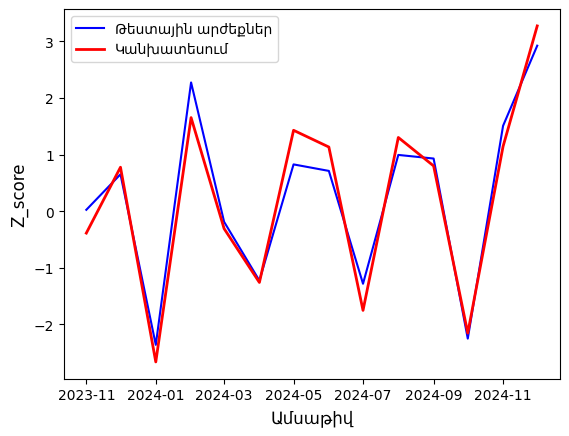

In [ ]:
plt.plot(Y_l_test, color='blue', label='Թեստային արժեքներ')
plt.plot(Y_l_pred, color='red', linewidth=2, label='Կանխատեսում')
plt.xlabel('Ամսաթիվ', fontsize=12)
plt.ylabel('Z_score',fontsize=12)
plt.legend()
plt.show()

In [ ]:
len(X_l_test)

14

In [ ]:
train_pred=model.predict(X_test_scaled)
mse = mean_squared_error(Y_l_test, train_pred)
r2 = r2_score(Y_l_test, train_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.12976156788429477
R^2 Score: 0.9439690653993988


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mae = mean_absolute_error(Y_l_test, train_pred)
mse = mean_squared_error(Y_l_test, train_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_l_test, train_pred)
print('Forecast Accuracy Metrics:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
# Interpretation:

Forecast Accuracy Metrics:
MAE: 0.31121441459375176
MSE: 0.12976156788429477
RMSE: 0.3602243299449591
MAPE: 1.4517891707614845


In [ ]:
df_compare=pd.DataFrame

In [ ]:
# Durbin-Watson test for independence of errors
dw = durbin_watson(model.resid)
print('Durbin-Watson:', dw)
#dw is 2.5 some level of negative autocorrelation in the residuals of your regression model

In [ ]:
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))
#there is no heterosketasticity in the model


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming `residuals` is the array of residuals from your model
ljung_box_result = acorr_ljungbox(model.resid, lags=[1,2,3,4,5])
ljung_box_result

In [ ]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

# Assuming `model` is your fitted OLS regression model
breusch_godfrey_result = acorr_breusch_godfrey(model, nlags=6)
print(breusch_godfrey_result)
#If p < 0.05, reject 𝐻0H 0  → Residuals are autocorrelated.

In [ ]:
# # Variance Inflation Factor (VIF) for multicollinearity
# vif = pd.DataFrame()
# vif['Variable'] = X_l.columns
# vif['VIF'] = [variance_inflation_factor(X_l.values, i) for i in range(X_l.shape[1])]
# print(vif)
#factors are quite autocorrelated with each other

In [ ]:
# Shapiro-Wilk test for normality of residuals
shapiro_test = shapiro(model.resid)
print('Shapiro-Wilk test:', shapiro_test)
#this test is not concrete: in one case, w stats is close to one, which indicates positive autocorrelation, on the other hand, pvalue <0.05 suggests evidence of autocorrelation

In [ ]:
ad_test = normal_ad(model.resid)
print('Anderson-Darling test:', ad_test)

In [ ]:
model.model.exog

In [ ]:
model.resid

In [ ]:
coefficients = model.params
p_values = model.pvalues

# Combining coefficients and p-values into a DataFrame for better display
results_df = pd.DataFrame({
    'Coefficient': coefficients,
    'P-value': p_values
})

print(results_df)

In [ ]:
results_df[results_df['P-value']<=0.05].sort_values(by='Coefficient', ascending=False)

In [ ]:

#results_df[results_df['P-value']<=0.05].to_csv('/content/drive/My Drive/Dissertation/lagged_coef_new.csv')

In [ ]:
# model_robust = model.get_robustcov_results(cov_type="HAC", maxlags=3)
# print(model_robust.summary())

In [ ]:
# from statsmodels.stats.diagnostic import acorr_breusch_godfrey

# # Assuming `model` is your fitted OLS regression model
# breusch_godfrey_result = acorr_breusch_godfrey(model_robust, nlags=3)
# print(breusch_godfrey_result)


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.graphics.tsa.plot_pacf(model.resid, lags=10)
plt.show()

#**Finish**

##**Implementing XGboost with time series cross validation**

In [ ]:
len(x_ls.columns.values)

In [ ]:
type(x_ls)

In [ ]:
X_l_train, X_l_test, Y_l_train, Y_l_test = train_test_split(x_ls, y_ls, test_size=0.1, random_state=0, shuffle=False)
# Create and train the linear regression model
X_l_train=X_l_train.astype(float)


In [ ]:
X_l_train

In [ ]:
X_l_train.index

In [ ]:
# X_l_test['date']=pd.to_datetime(X_l_test.index)
# X_l_test['month'] = X_l_test['date'].dt.month

# # Extract relevant features
# X_l_test['year'] = X_l_test['date'].dt.year

# # Create cyclical features for month to capture seasonality
# X_l_test['month_sin'] = np.sin(2 * np.pi * X_l_test['month'] / 12)
# X_l_test['month_cos'] = np.cos(2 * np.pi * X_l_test['month'] / 12)

# # Optionally, create a continuous time index if you expect a trend over time
# X_l_test['time_index'] = np.arange(len(X_l_test))
# X_l_test=X_l_test.drop('date', axis=1)

In [ ]:

# # X_l_train['date'] = pd.to_datetime(X_l_train.index)
# x_ls['date']=pd.to_datetime(x_ls.index)
# x_ls['month'] = x_ls['date'].dt.month

# # Extract relevant features
# x_ls['year'] = x_ls['date'].dt.year

# # Create cyclical features for month to capture seasonality
# x_ls['month_sin'] = np.sin(2 * np.pi * x_ls['month'] / 12)
# x_ls['month_cos'] = np.cos(2 * np.pi * x_ls['month'] / 12)

# # Optionally, create a continuous time index if you expect a trend over time
# x_ls['time_index'] = np.arange(len(x_ls))
# x_ls=x_ls.drop('date', axis=1)

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import r2_score

# Assume x_ls and y_ls are your DataFrame predictors and target
# Create a pipeline that standardizes data and then fits an XGBoost model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Define the parameter grid for XGBoost hyperparameters
param_grid = {
    'xgb__n_estimators': [100, 300, 500],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 5, 7],
    'xgb__subsample': [0.7, 0.8, 1.0],
    'xgb__colsample_bytree': [0.7, 0.8, 1.0],
    'xgb__gamma': [0, 0.1, 0.2]
}

# Use TimeSeriesSplit for time-aware cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=tscv, scoring='r2', n_jobs=-1, verbose=2)

# Fit grid search on the data
grid_search.fit(X_l_train, Y_l_train)

# Output best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

# Use the best estimator to make predictions and evaluate performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_l_test)
final_r2 = r2_score(Y_l_test, y_pred)
print(f"Final Model R² Score: {final_r2:.4f}")

# Calculate RMSE


In [ ]:
#OLS rmse= 0.11621828771709417

In [ ]:
y_ls

In [ ]:
mse = mean_squared_error(Y_l_test, y_pred)
rmse = np.sqrt(mse)
print(f"Final Model RMSE: {rmse:.4f}")

In [ ]:
#while testing only on test dataset

In [ ]:
len(y_pred)

In [ ]:
# Fitting 5 folds for each of 729 candidates, totalling 3645 fits
# Best Parameters: {'xgb__colsample_bytree': 1.0, 'xgb__gamma': 0.1, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 5, 'xgb__n_estimators': 500, 'xgb__subsample': 0.7}
# Best R² Score: 0.48941687270781137
# Final Model R² Score: 0.9879

In [ ]:

# xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
# grid_search.fit(x_ls, y_ls)
# print("Best Parameters:", grid_search.best_params_)
# print("Best R² Score:", grid_search.best_score_)

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import r2_score


tscv = TimeSeriesSplit(n_splits=5)
rmse_scores = []

# 4. Train and evaluate the model in each fold
for fold, (train_index, test_index) in enumerate(tscv.split(x_ls)):
    X_train, X_test = x_ls.iloc[train_index], x_ls.iloc[test_index]
    y_train, y_test = y_ls.iloc[train_index], y_ls.iloc[test_index]

    model = xgb.XGBRegressor(
        objective='reg:squarederror',


xgb__colsample_bytree= 1,
xgb__gamma=0.1,
xgb__learning_rate=0.01,
xgb__max_depth= 5,
xgb__n_estimators= 500,
  xgb__subsamples= 0.7,
        random_state=42
)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

    print(f"Fold {fold + 1} RMSE: {rmse:.4f}")

print("\nAverage RMSE over all folds:", np.mean(rmse_scores))


In [ ]:
# Fold 1 RMSE: 1.3554
# Fold 2 RMSE: 1.2265
# Fold 3 RMSE: 0.6464
# Fold 4 RMSE: 1.1958
# Fold 5 RMSE: 1.0064

# max_depth=20

In [ ]:
# Access the XGBoost model from the pipeline
xgb_model = best_model.named_steps['xgb']

# Retrieve the feature importances from the XGBoost estimator
importance = xgb_model.feature_importances_

# Since StandardScaler doesn't change the order of features,
# you can use the original DataFrame's column names.
feature_names = x_ls.columns

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

In [ ]:
#x_ls is the model based on the filtered factor list, so ridge and lasso regularization techniques, used with tscv and gird search are the best models

## **XGBOOST on the full factor list**

In [ ]:

x_full=all_and_lagged[['Z-score']]
y_full=all_and_lagged.drop('Z-score', axis=1)

In [ ]:
type(y_full)

In [ ]:
X_l_train, X_l_test, Y_l_train, Y_l_test = train_test_split(x_full, y_full, test_size=0.1, random_state=0, shuffle=False)
# Create and train the linear regression model


In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import r2_score

# Assume x_ls and y_ls are your DataFrame predictors and target
# Create a pipeline that standardizes data and then fits an XGBoost model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Define the parameter grid for XGBoost hyperparameters
param_grid = {
    'xgb__n_estimators': [100, 300, 500],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 5, 7],
    'xgb__subsample': [0.7, 0.8, 1.0],
    'xgb__colsample_bytree': [0.7, 0.8, 1.0],
    'xgb__gamma': [0, 0.1, 0.2]
}

# Use TimeSeriesSplit for time-aware cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=tscv, scoring='r2', n_jobs=-1, verbose=2)

# Fit grid search on the data
grid_search.fit(X_l_train, Y_l_train)

# Output best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

# Use the best estimator to make predictions and evaluate performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_l_test)
final_r2 = r2_score(Y_l_test, y_pred)
print(f"Final Model R² Score: {final_r2:.4f}")

# Calculate RMSE

In [ ]:
xgb_model = best_model.named_steps['xgb']

# Retrieve the feature importances from the XGBoost estimator
importance = xgb_model.feature_importances_

# Since StandardScaler doesn't change the order of features,
# you can use the original DataFrame's column names.
feature_names = x_ls.columns

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

In [ ]:
mse = mean_squared_error(y_full, y_pred)
rmse = np.sqrt(mse)
print(f"Final Model RMSE: {rmse:.4f}")

## **Evaluating 1D CNN**

In [ ]:
X_l_train, X_l_test, Y_l_train, Y_l_test = train_test_split(x_full, y_full, test_size=0.1, random_state=0, shuffle=False)


In [ ]:
#X_l_train, X_l_test, Y_l_train, Y_l_test = train_test_split(x_ls, y_ls, test_size=0.1, random_state=0, shuffle=False)
# Create and train the linear regression model
X_l_train=X_l_train.astype(float)


In [ ]:
!pip install torch torchvision torchaudio


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 1D CNN model
class CNN1DRegressor(nn.Module):
    def __init__(self, input_channels, output_size):
        super(CNN1DRegressor, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)

        self.relu = nn.ReLU()
        self.pool = nn.AdaptiveAvgPool1d(1)  # Reduce to 1 feature per channel
        self.fc = nn.Linear(128, output_size)  # Fully connected layer

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.pool(x).squeeze(-1)  # Global average pooling
        x = self.fc(x)
        return x


In [ ]:
x_ls.columns.values

In [ ]:
import numpy as np

# Simulated time series dataset
num_samples = len(X_l_train)  # 145 months of data
sequence_length = 10  # Using past 10 months for prediction
num_features = len(X_l_train.columns.values)  # Two input features

# Random feature data and target
# X = np.random.randn(num_samples, num_features).astype(np.float32)
# y = np.random.randn(num_samples, 1).astype(np.float32)  # Target variable

# Create sequences
X_seq, y_seq = [], []
for i in range(num_samples - sequence_length):
    X_seq.append(X_l_train[i : i + sequence_length])
    y_seq.append(Y_l_train[i + sequence_length])  # Predicting the next time step

X_seq = np.array(X_seq)  # Shape: (samples, sequence_length, features)
y_seq = np.array(y_seq)  # Shape: (samples, 1)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_seq, dtype=torch.float32).permute(0, 2, 1)  # Reshape to (batch, channels, seq_len)
y_tensor = torch.tensor(y_seq, dtype=torch.float32)

# Create DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(dataset, batch_size=16, shuffle=True)


In [ ]:
# Initialize model, loss function, optimizer
input_channels = num_features
output_size = 1
model = CNN1DRegressor(input_channels, output_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

print("Training complete.")


In [ ]:
X_l_test.shape

In [ ]:
# Convert test DataFrame to NumPy
test_X_array = X_l_test.to_numpy(dtype=np.float32)  # Shape: (num_samples, num_features)
test_y_array = Y_l_test.to_numpy(dtype=np.float32)  # Shape: (num_samples, 1)

# Ensure the correct shape: (num_samples - sequence_length, sequence_length, num_features)
test_X_array = test_X_array.reshape(-1, sequence_length, num_features)

# Convert to PyTorch tensors
test_X_tensor = torch.tensor(test_X_array, dtype=torch.float32).permute(0, 2, 1)  # Shape: (batch, features, seq_len)
test_y_tensor = torch.tensor(test_y_array, dtype=torch.float32)  # Shape: (batch, 1)

# Create a DataLoader for the test set
test_dataset = TensorDataset(test_X_tensor, test_y_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)  # No shuffle for test data


##**Testing** 1d CNN

In [ ]:
import numpy as np
import torch

sequence_length = 10  # Ensure this matches the training sequence length
num_features = X_l_test.shape[1]  # Automatically detect features

# Convert test DataFrame to NumPy array
test_X_array = X_l_test.to_numpy(dtype=np.float32)  # Shape: (14, num_features)
test_y_array = Y_l_test.to_numpy(dtype=np.float32)  # Shape: (14, 1)

# Create sequences from test data (like during training)
test_X_seq, test_y_seq = [], []
for i in range(len(test_X_array) - sequence_length):
    test_X_seq.append(test_X_array[i : i + sequence_length])
    test_y_seq.append(test_y_array[i + sequence_length])  # Next time step

# Convert to NumPy arrays
test_X_seq = np.array(test_X_seq)  # Shape: (num_samples - sequence_length, sequence_length, num_features)
test_y_seq = np.array(test_y_seq)  # Shape: (num_samples - sequence_length, 1)

# Convert to PyTorch tensors
test_X_tensor = torch.tensor(test_X_seq, dtype=torch.float32).permute(0, 2, 1)  # Shape: (batch, features, seq_len)
test_y_tensor = torch.tensor(test_y_seq, dtype=torch.float32)  # Shape: (batch, 1)

# Check the shapes
print(f"test_X_tensor shape: {test_X_tensor.shape}")  # Expected: (num_samples - sequence_length, num_features, sequence_length)
print(f"test_y_tensor shape: {test_y_tensor.shape}")  # Expected: (num_samples - sequence_length, 1)

test_dataset = TensorDataset(test_X_tensor, test_y_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)  # No shuffle for test data


In [ ]:
test_X_array

In [ ]:
model.eval()  # Set the model to evaluation mode

y_true = []
y_pred = []

with torch.no_grad():  # Disable gradient tracking
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(torch.float32)  # Ensure correct dtype

        predictions = model(X_batch)  # Model prediction
        y_true.extend(y_batch.numpy().flatten())  # Store actual values
        y_pred.extend(predictions.numpy().flatten())  # Store predicted values


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute error metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_true, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color="red", linestyle="--")  # Identity line
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert lists to NumPy arrays (ensure these are available from your test prediction results)
y_true_np = np.array(y_true)  # Replace with actual values
y_pred_np = np.array(y_pred)  # Replace with predicted values

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_true_np, label="Actual Values", linestyle="-", marker="o", alpha=0.7)
plt.plot(y_pred_np, label="Predicted Values", linestyle="--", marker="s", alpha=0.7)
plt.xlabel("Test Sample Index")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted on Test Data")
plt.legend()
plt.grid(True)
plt.show()